In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.6-cp39-cp39-macosx_11_0_arm64.whl size=139946 sha256=08bdd53725111b24c723f746b66b6ced5cf10f6c1d5e6dd8eab7bb143b74856d
  Stored in directory: /Users/bhavu/Library/Caches/pip/wheels/3e/23/b4/7729b2d48a34ee9d95c11f7f8dfd4ff0571a056e2691118b34
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
import os

In [3]:
if os.path.exists("nifty50.csv"):
    nifty50 = pd.read_csv("nifty50.csv", index_col=0)
else:
    nifty50 = yf.Ticker("^NSEI")
    nifty50 = nifty50.history(period="max")
    nifty50.to_csv("nifty50.csv")

In [5]:
nifty50.index = pd.to_datetime(nifty50.index)

/var/folders/m8/s3j_brrx26b6dzct0t1mb8wr0000gn/T/ipykernel_77359/1526570418.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  nifty50.index = pd.to_datetime(nifty50.index)


In [6]:
nifty50

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-20 00:00:00-04:00,5602.879883,5620.509766,5585.500000,5597.120117,2994420000,0.0,0.0
2024-08-21 00:00:00-04:00,5603.089844,5632.680176,5591.569824,5620.850098,3119670000,0.0,0.0
2024-08-22 00:00:00-04:00,5637.770020,5643.220215,5560.950195,5570.640137,2981530000,0.0,0.0


<Axes: xlabel='Date'>

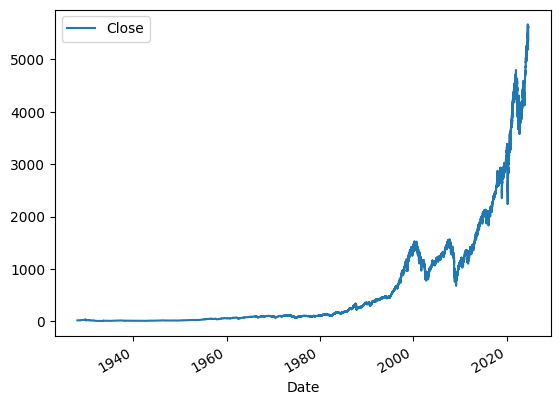

In [7]:
nifty50.plot.line(y="Close", use_index=True)

In [38]:
import matplotlib.pyplot as plt

In [53]:
ma4yrs = nifty50.Close.rolling(252*4).mean()
ma4yrs

Date
1936-01-10 00:00:00-05:00            NaN
1936-01-13 00:00:00-05:00            NaN
1936-01-14 00:00:00-05:00            NaN
1936-01-15 00:00:00-05:00            NaN
1936-01-16 00:00:00-05:00            NaN
                                ...     
2024-08-20 00:00:00-04:00    4307.190946
2024-08-21 00:00:00-04:00    4309.404309
2024-08-22 00:00:00-04:00    4311.582673
2024-08-23 00:00:00-04:00    4313.813922
2024-08-26 00:00:00-04:00    4316.015986
Name: Close, Length: 22279, dtype: float64

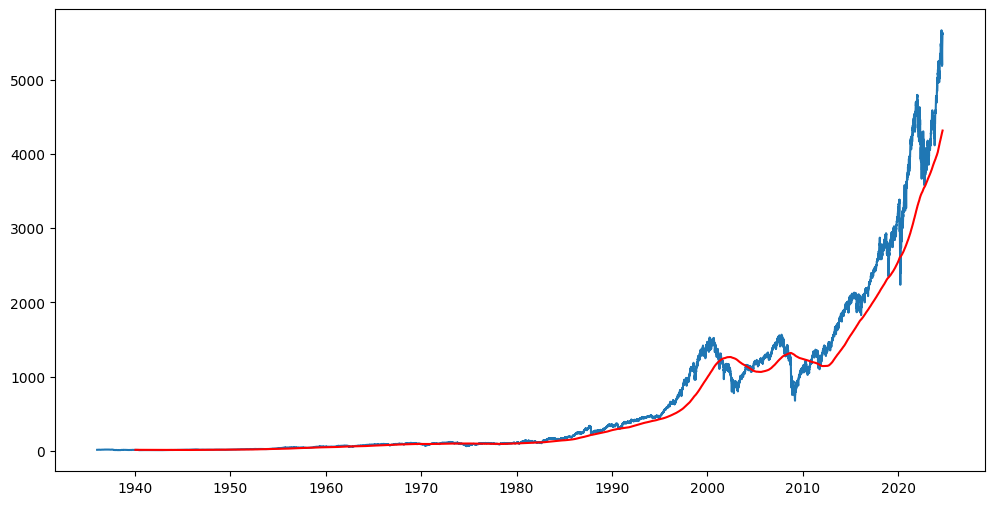

In [54]:
plt.figure(figsize = (12,6))
plt.plot(nifty50.Close)
plt.plot(ma4yrs, 'r')

In [55]:
ma8yrs = nifty50.Close.rolling(252*8).mean()
ma8yrs

Date
1936-01-10 00:00:00-05:00            NaN
1936-01-13 00:00:00-05:00            NaN
1936-01-14 00:00:00-05:00            NaN
1936-01-15 00:00:00-05:00            NaN
1936-01-16 00:00:00-05:00            NaN
                                ...     
2024-08-20 00:00:00-04:00    3507.190517
2024-08-21 00:00:00-04:00    3508.898205
2024-08-22 00:00:00-04:00    3510.578969
2024-08-23 00:00:00-04:00    3512.289083
2024-08-26 00:00:00-04:00    3513.991945
Name: Close, Length: 22279, dtype: float64

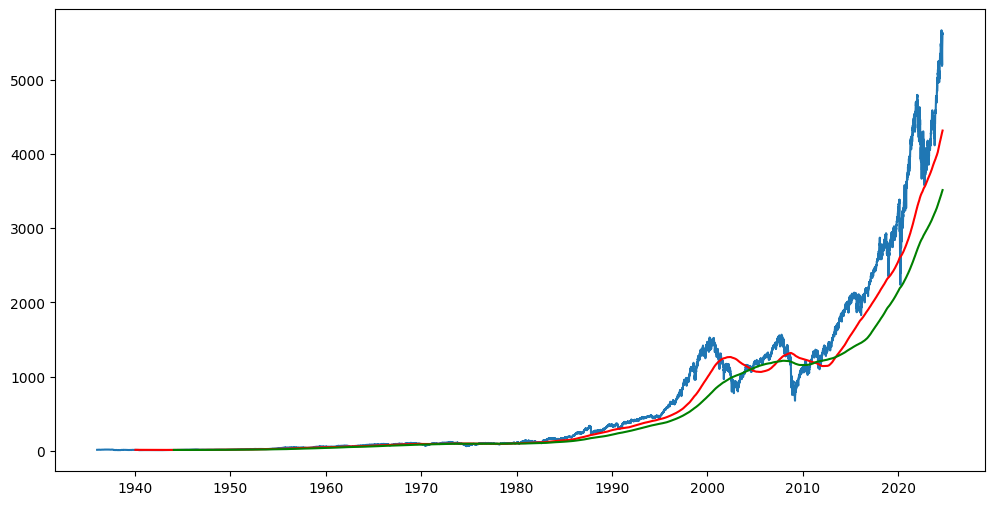

In [57]:
plt.figure(figsize = (12,6))
plt.plot(nifty50.Close)
plt.plot(ma4yrs, 'r')
plt.plot(ma8yrs, 'g')

In [8]:
del nifty50["Dividends"]
del nifty50["Stock Splits"]

In [9]:
nifty50["Tomorrow"] = nifty50["Close"].shift(-1)

In [10]:
nifty50["Target"] = (nifty50["Tomorrow"] > nifty50["Close"]).astype(int)

SyntaxError: cannot assign to function call (4183416564.py, line 1)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = nifty50.iloc[:-100]
test = nifty50.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5

<Axes: xlabel='Date'>

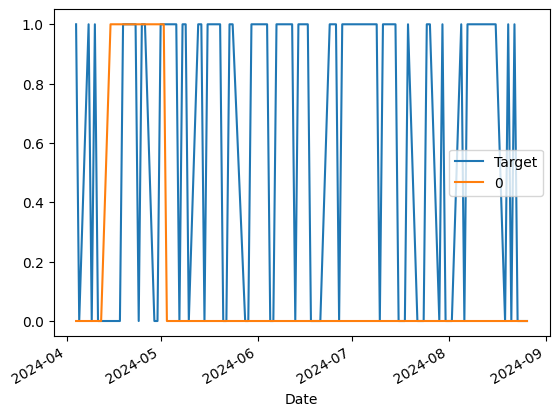

In [13]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [14]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [15]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [16]:
predictions = backtest(nifty50, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    12318
1     9461
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5166472888700983

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.526562
0    0.473438
Name: count, dtype: float64

In [27]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = nifty50.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    nifty50[ratio_column] = nifty50["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nifty50[trend_column] = nifty50.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

/var/folders/m8/s3j_brrx26b6dzct0t1mb8wr0000gn/T/ipykernel_77359/1283602190.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50[ratio_column] = nifty50["Close"] / rolling_averages["Close"]
/var/folders/m8/s3j_brrx26b6dzct0t1mb8wr0000gn/T/ipykernel_77359/1283602190.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50[trend_column] = nifty50.shift(1).rolling(horizon).sum()["Target"]


In [28]:
nifty50 = nifty50.dropna(subset=nifty50.columns[nifty50.columns != "Tomorrow"])

In [29]:
nifty50

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1936-01-10 00:00:00-05:00,13.780000,13.780000,13.780000,13.780000,0,13.720000,0,1.004007,1.0,1.010560,3.0,1.066921,36.0,1.288915,136.0,1.510418,481.0
1936-01-13 00:00:00-05:00,13.720000,13.720000,13.720000,13.720000,0,13.800000,1,0.997818,1.0,1.001606,3.0,1.059760,35.0,1.281161,136.0,1.502916,480.0
1936-01-14 00:00:00-05:00,13.800000,13.800000,13.800000,13.800000,0,13.710000,0,1.002907,1.0,1.004806,3.0,1.063420,35.0,1.286406,137.0,1.510739,480.0
1936-01-15 00:00:00-05:00,13.710000,13.710000,13.710000,13.710000,0,13.770000,1,0.996728,1.0,0.998107,2.0,1.053791,35.0,1.275757,137.0,1.499877,480.0
1936-01-16 00:00:00-05:00,13.770000,13.770000,13.770000,13.770000,0,13.750000,0,1.002183,1.0,1.001018,3.0,1.055806,35.0,1.279069,137.0,1.505417,481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20 00:00:00-04:00,5602.879883,5620.509766,5585.500000,5597.120117,2994420000,5620.850098,1,0.999007,1.0,1.008198,4.0,1.027831,38.0,1.134692,146.0,1.297353,527.0
2024-08-21 00:00:00-04:00,5603.089844,5632.680176,5591.569824,5620.850098,3119670000,5570.640137,0,1.002115,1.0,1.006466,4.0,1.031191,38.0,1.138409,146.0,1.302215,527.0
2024-08-22 00:00:00-04:00,5637.770020,5643.220215,5560.950195,5570.640137,2981530000,5634.609863,1,0.995514,1.0,0.996497,3.0,1.021153,37.0,1.127149,146.0,1.289964,527.0


In [30]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
predictions = backtest(nifty50, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

Predictions
0.0    16521
1.0     3258
Name: count, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5933087783916513

In [35]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.529097
0    0.470903
Name: count, dtype: float64

In [37]:
predictions

,Target,Predictions
Date,,
1946-01-09 00:00:00-05:00,1,0.0
1946-01-10 00:00:00-05:00,1,0.0
1946-01-11 00:00:00-05:00,1,0.0
1946-01-14 00:00:00-05:00,1,0.0
1946-01-15 00:00:00-05:00,1,0.0
...,...,...
2024-08-20 00:00:00-04:00,1,0.0
2024-08-21 00:00:00-04:00,0,1.0
2024-08-22 00:00:00-04:00,1,0.0


In [77]:
# Use the last 100 days as the test set
test = nifty50.iloc[-200:]

# Use all data except the last 100 days as the training set
train = nifty50.iloc[:-200]

# Train the model
model.fit(train[new_predictors], train["Target"])

# Make predictions on the test set
preds = model.predict_proba(test[new_predictors])[:,1]
preds[preds >= 0.6] = 1
preds[preds < 0.6] = 0

# Calculate the precision score
precision = precision_score(test["Target"], preds)

print(f"Precision score for the last 200 days: {precision:.4f}")


Precision score for the last 200 days: 0.6316
